<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 138.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 165.3 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 142.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 154.7 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-08-15 06:29:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.2MB/s    in 2.4s    

2025-08-15 06:29:50 (63.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
# Set max_rows to None to display all rows
pd.set_option('display.max_rows', None)
# Set the option to display all columns
pd.set_option('display.max_columns', None)
# ===================================================================================================
# Functional automatization & Data Preprocessing

def get_summary_stats(df):
    """
    Returns summary statistics for each column in the DataFrame.
    """
    return pd.DataFrame({
        "Column name": df.columns,  # Column names
        "DataType": df.dtypes.values,  # Data types of columns
        "Number of rows": df.shape[0],  # Total number of rows
        "Number of columns": df.shape[1],  # Total number of columns
        "Not-Null Columns": df.notnull().sum().values,  # Count of non-missing values
        "Missing Count": df.isnull().sum().values,  # Count of missing values
        "Missing Percentage": (df.isnull().mean() * 100).values  # Percentage of missing values
    })

summary_stats = get_summary_stats(df)
display(summary_stats)

# ===================================================================================================

# ===================================================================================================
def split_and_explode(df, column, sep=';'):
    """
    Split a column by a separator and explode it into multiple rows.
    Also strips leading/trailing spaces from each element.

    df: input DataFrame
    column: name of the column to split & explode
    sep: separator to split the string (default: ';')
    """
    df_copy = df.copy()
    # Split the column
    df_copy[column] = df_copy[column].str.split(sep)
    # Explode into multiple rows
    df_copy = df_copy.explode(column)
    # Remove leading/trailing spaces
    df_copy[column] = df_copy[column].str.strip()
    
    return df_copy
# ===================================================================================================

# ===================================================================================================
# Age mapping
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# YearsCodePro mapping
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

def prepare_dataframe(df, columns, remove_outliers=False, iqr_column=None):
    """
    Prepares a DataFrame for plotting or analysis.
    
    Parameters:
        df (DataFrame): Original DataFrame.
        columns (list): List of columns to keep (drop rows with NaN in these columns).
        remove_outliers (bool): Whether to remove extreme values using IQR.
        iqr_column (str): Column used for IQR calculation.
    
    Returns:
        DataFrame: Cleaned DataFrame ready for analysis.
    """
    df_clean = df.copy()
    
    # Map Age values to numerical values
    if 'Age' in df_clean.columns:
        df_clean['Age_mapped'] = df_clean['Age'].map(age_mapping)
    
    # Replace text-based YearsCodePro values and convert to numeric
    if 'YearsCodePro' in df_clean.columns:
        df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace(years_mapping)
        df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
    
    # Drop NaN values in the required columns
    df_clean = df_clean.dropna(subset=columns).copy()
    
    # Remove outliers if enabled
    if remove_outliers and iqr_column:
        Q1 = df_clean[iqr_column].quantile(0.25)
        Q3 = df_clean[iqr_column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[iqr_column] >= lower) & (df_clean[iqr_column] <= upper)].copy()
    
    return df_clean
# ===================================================================================================

name = 'Diyor'
print(f'All codebases created by {name}')

,Column name,DataType,Number of rows,Number of columns,Not-Null Columns,Missing Count,Missing Percentage
0,ResponseId,int64,65437,114,65437,0,0.000000
1,MainBranch,object,65437,114,65437,0,0.000000
2,Age,object,65437,114,65437,0,0.000000
3,Employment,object,65437,114,65437,0,0.000000
4,RemoteWork,object,65437,114,54806,10631,16.246160
5,Check,object,65437,114,65437,0,0.000000
6,CodingActivities,object,65437,114,54466,10971,16.765744
7,EdLevel,object,65437,114,60784,4653,7.110656
8,LearnCode,object,65437,114,60488,4949,7.563000
9,LearnCodeOnline,object,65437,114,49237,16200,24.756636


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



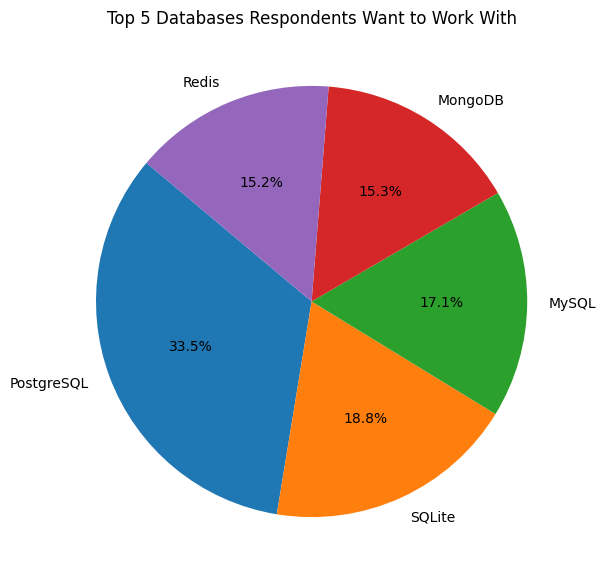

In [ ]:
##Write your code here
# Use mine automatized function to split and explode the column
df_exploded = split_and_explode(df, 'DatabaseWantToWorkWith', sep=';')

# Count the occurrences of each unique database and get the top 5
top5 = df_exploded['DatabaseWantToWorkWith'].value_counts().head(5)

# Plot the Pie Chart
plt.figure(figsize=(7,7))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.show()

name = 'Diyor'
print(f'All codebases created by {name}')

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



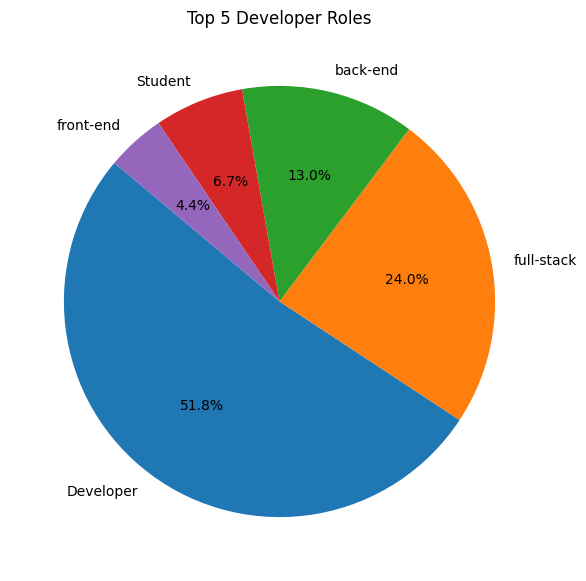

In [ ]:
##Write your code here
# Use mine automatized function to split and explode the column
df_exploded = split_and_explode(df, 'DevType', sep=',')

# Count the occurrences of each developer type and get the top 5
top5_devtypes = df_exploded['DevType'].value_counts().head(5)

# Plot the Pie Chart
plt.figure(figsize=(7,7))
plt.pie(top5_devtypes, labels=top5_devtypes.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Developer Roles')
plt.show()

name = 'Diyor'
print(f'All codebases created by {name}')

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



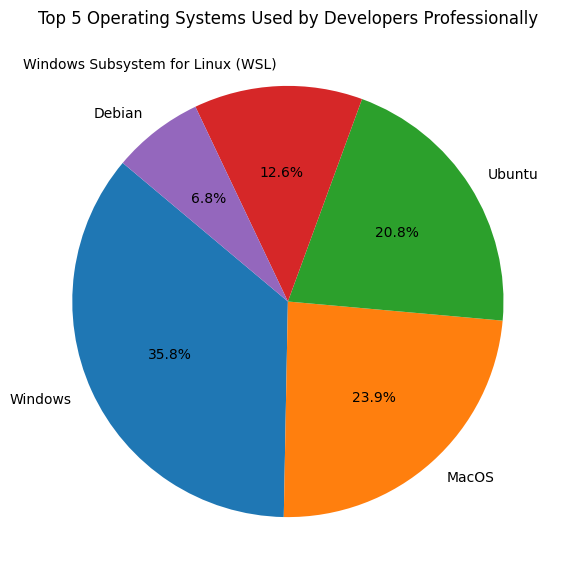

In [ ]:
##Write your code here
# Use mine automatized function to split and explode the OpSysProfessional use column
df_exploded = split_and_explode(df, 'OpSysProfessional use', sep=';')

# Count the occurrences of each OS and get the top 5
top5_os = df_exploded['OpSysProfessional use'].value_counts().head(5)

# Plot the Pie Chart
plt.figure(figsize=(7,7))
plt.pie(top5_os, labels=top5_os.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Operating Systems Used by Developers Professionally')
plt.show()

name = 'Diyor'
print(f'All codebases created by {name}')

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



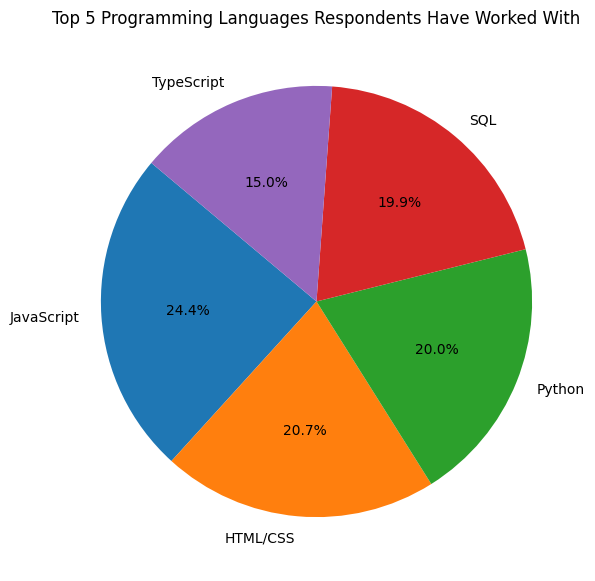

In [ ]:
##Write your code here
# df['LanguageHaveWorkedWith'].unique()

# Use mine automatized function to split and explode the LanguageHaveWorkedWith column
df_exploded = split_and_explode(df, 'LanguageHaveWorkedWith', sep=';')

# Count the occurrences of each programming language and get the top 5
top5_langs = df_exploded['LanguageHaveWorkedWith'].value_counts().head(5)

# Plot the Pie Chart
plt.figure(figsize=(7,7))
plt.pie(top5_langs, labels=top5_langs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Programming Languages Respondents Have Worked With')
plt.show()

name = 'Diyor'
print(f'All codebases created by {name}')

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



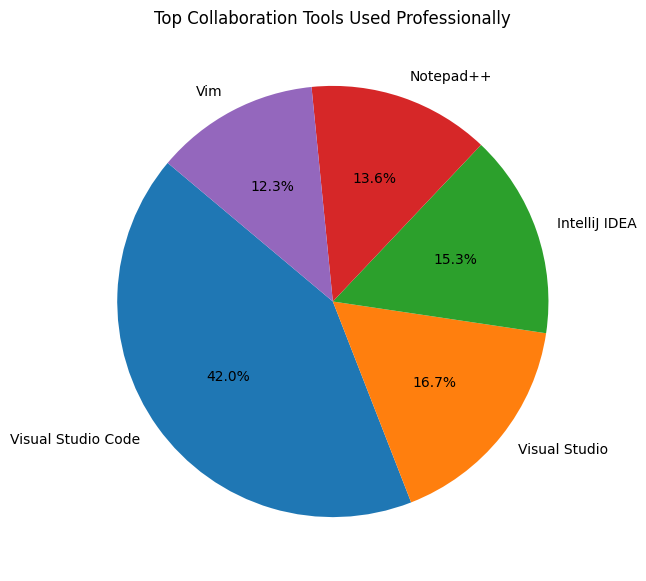

In [ ]:
##Write your code here
# df['NEWCollabToolsHaveWorkedWith'].unique()

# Use mine automatized function to split and explode the NEWCollabToolsHaveWorkedWith column
df_exploded = split_and_explode(df, 'NEWCollabToolsHaveWorkedWith', sep=';')

# Count the occurrences of each collaboration tool and get the top 5
top5_tools = df_exploded['NEWCollabToolsHaveWorkedWith'].value_counts().head(5)

# Plot the Pie Chart
plt.figure(figsize=(7,7))
plt.pie(top5_tools, labels=top5_tools.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Collaboration Tools Used Professionally')
plt.show()

name = 'Diyor'
print(f'All codebases created by {name}')

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



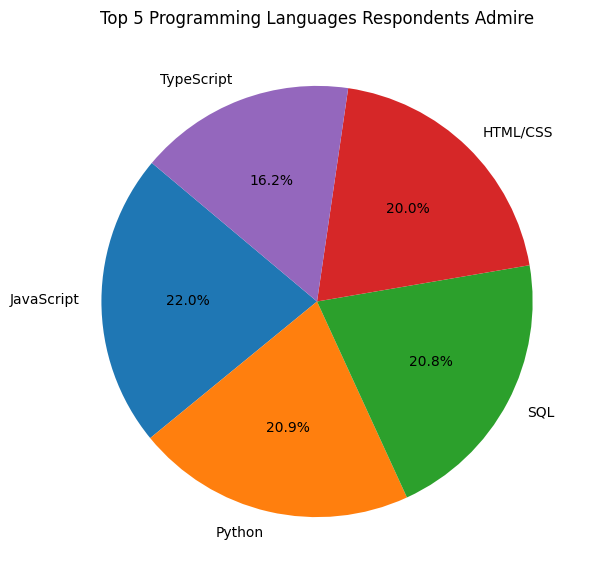

In [ ]:

#print(df['Respondents'].unique())
# print(df['LanguageAdmired'].unique())

# Use mine automatized function to split and explode the LanguageAdmired column
df_exploded = split_and_explode(df, 'LanguageAdmired', sep=';')

# Count the occurrences of each admired language and get the top 5
top5_admired = df_exploded['LanguageAdmired'].value_counts().head(5)

# Plot the Pie Chart
plt.figure(figsize=(7,7))
plt.pie(top5_admired, labels=top5_admired.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Programming Languages Respondents Admire')
plt.show()

name = 'Diyor'
print(f'All codebases created by {name}')

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



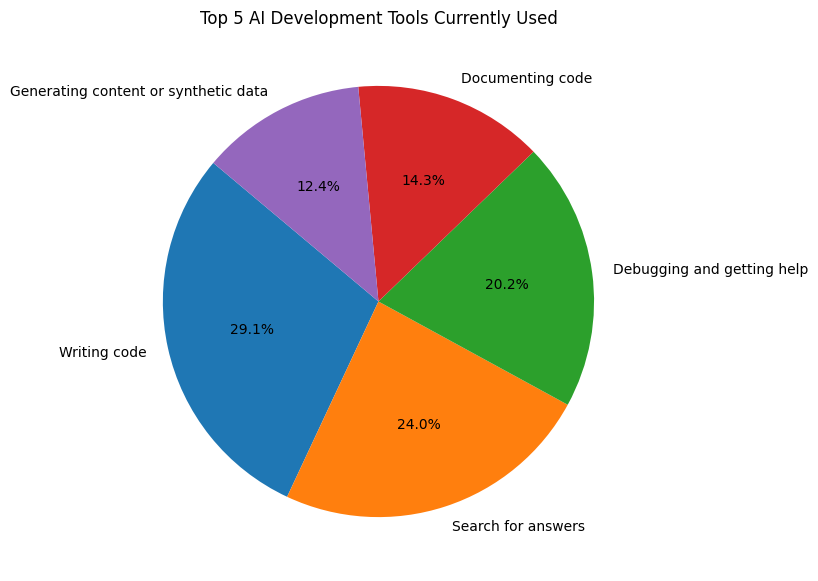

In [ ]:
##Write your code here
# df['AIToolCurrently Using'].unique()

# Use mine automatized function to split and explode the AIToolCurrently Using column
df_exploded = split_and_explode(df, 'AIToolCurrently Using', sep=';')

# Count the occurrences of each AI tool and get the top 5
top5_ai_tools = df_exploded['AIToolCurrently Using'].value_counts().head(5)

# Plot the Pie Chart
plt.figure(figsize=(7,7))
plt.pie(top5_ai_tools, labels=top5_ai_tools.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 AI Development Tools Currently Used')
plt.show()

name = 'Diyor'
print(f'All codebases created by {name}')

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



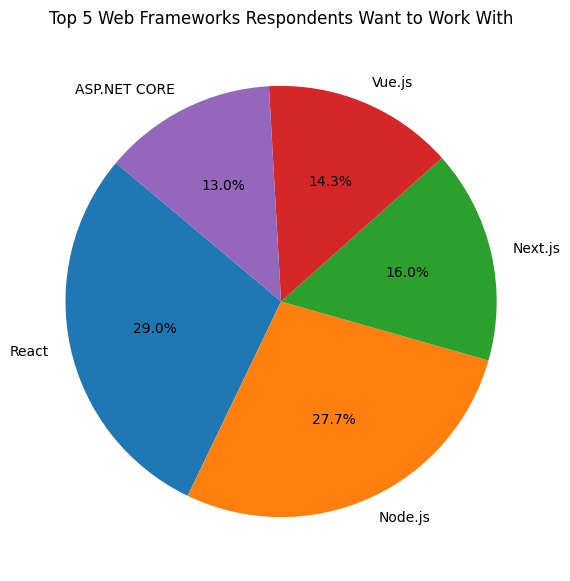

In [ ]:
##Write your code here
# df['WebframeWantToWorkWith'].unique()

# Use mine function to split and explode the WebframeWantToWorkWith column
df_exploded = split_and_explode(df, 'WebframeWantToWorkWith', sep=';')

# Count the occurrences of each web framework and get the top 5
top5_webframes = df_exploded['WebframeWantToWorkWith'].value_counts().head(5)

# Plot the Pie Chart
plt.figure(figsize=(7,7))
plt.pie(top5_webframes, labels=top5_webframes.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Web Frameworks Respondents Want to Work With')
plt.show()

name = 'Diyor'
print(f'All codebases created by {name}')

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



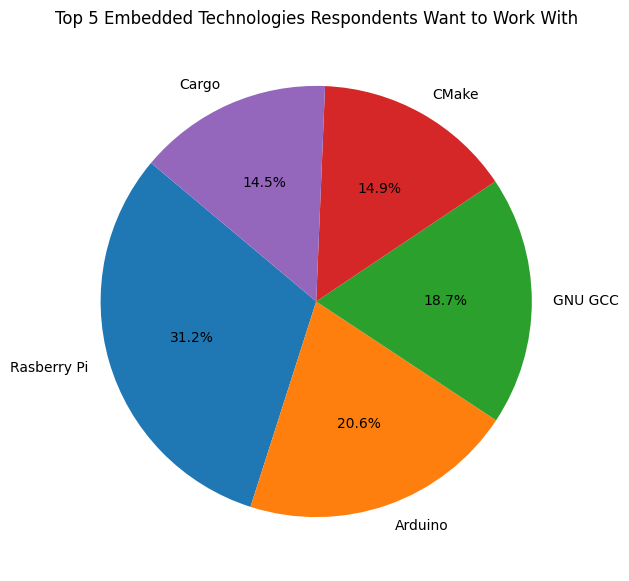

All codebases created by Diyor


In [ ]:
##Write your code here
# df['EmbeddedWantToWorkWith'].unique()

# Use mine function to split and explode the EmbeddedWantToWorkWith column
df_exploded = split_and_explode(df, 'EmbeddedWantToWorkWith', sep=';')

# Count the occurrences of each embedded technology and get the top 5
top5_embedded = df_exploded['EmbeddedWantToWorkWith'].value_counts().head(5)

# Plot the Pie Chart
plt.figure(figsize=(7,7))
plt.pie(top5_embedded, labels=top5_embedded.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Embedded Technologies Respondents Want to Work With')
plt.show()

name = 'Diyor'
print(f'All codebases created by {name}')

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
